2023-1-60-075

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
img = cv2.imread('/content/Picture2.jpg')
if img is not None:
    print("Image loaded successfully.")
    print(f"Image shape: {img.shape}")
else:
    print("Failed to load image. Please check the file path.")

Image loaded successfully.
Image shape: (290, 240, 3)


In [15]:
if img is not None:
    # 1. Convert to grayscale if not already
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    # 2. Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # 3. Calculate the unsharp mask
    unsharp_mask = cv2.subtract(gray, blurred)
    # 4. Apply unsharp masking
    sharpened_unsharp_mask = cv2.add(gray, unsharp_mask)
    # Clip the values to the valid range [0, 255]
    sharpened_unsharp_mask = np.clip(sharpened_unsharp_mask, 0,
    255).astype(np.uint8)
    print("Unsharp Masking applied successfully.")
else:
    print("Image not loaded, cannot apply")

Unsharp Masking applied successfully.


In [16]:
if img is not None:
    # Apply Gaussian Blur (Low-pass filter)
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    A = 2.8
    sharpened_high_boost = cv2.addWeighted(src1=img, alpha=A,
    src2=blurred, beta=-(A - 1), gamma=0)
    print("High Boost Filtering applied successfully.")
else:
    print("Image not loaded, cannot apply High Boost Filtering.")

High Boost Filtering applied successfully.


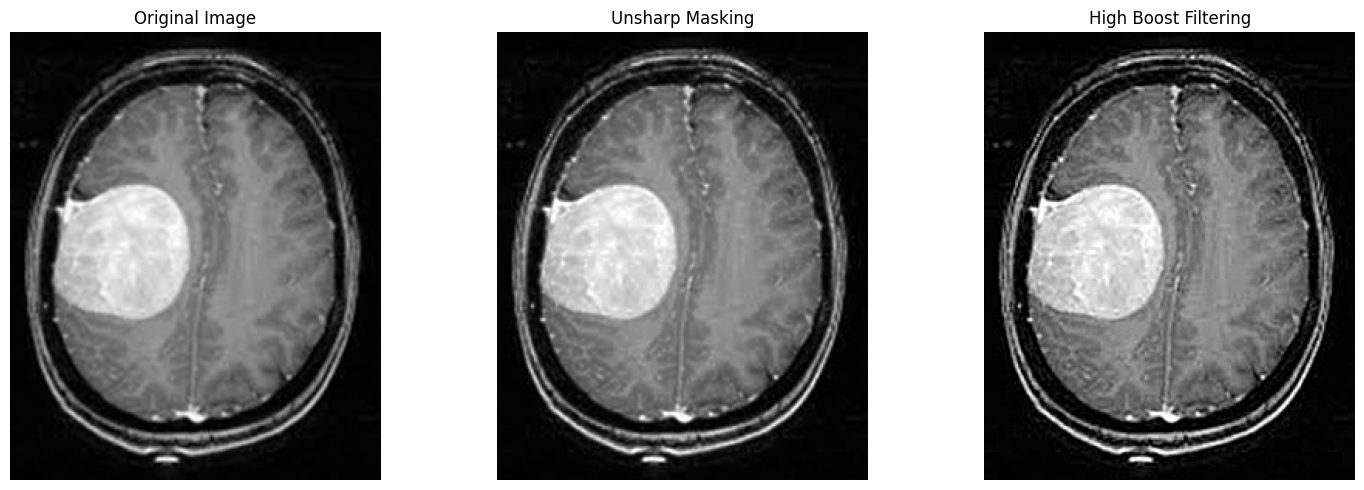

In [17]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Display original image
if img is not None:
    if len(img.shape) == 3:
        axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        axes[0].imshow(img, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    # Display unsharp masked image
    axes[1].imshow(sharpened_unsharp_mask, cmap='gray')
    axes[1].set_title("Unsharp Masking")
    axes[1].axis('off')
    # Display high boost filtered image
    axes[2].imshow(sharpened_high_boost, cmap='gray')
    axes[2].set_title("High Boost Filtering")
    axes[2].axis('off')
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

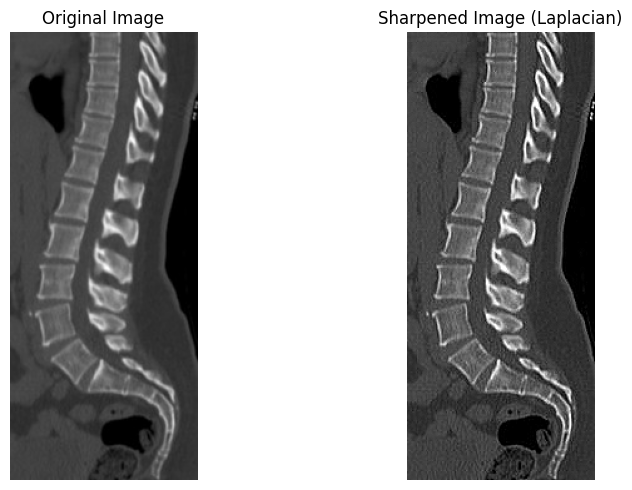

Laplacian Filtering applied successfully.


In [18]:
# Load the image
img = cv2.imread('/content/Picture3.jpg')
if img is not None:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Laplacian filter
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    # Convert back to uint8 and add to original gray image
    sharpened_laplacian = np.uint8(np.clip(gray - laplacian, 0, 255))
    # Display the original and sharpened images side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(gray, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(sharpened_laplacian, cmap='gray')
    axes[1].set_title("Sharpened Image (Laplacian)")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
    print("Laplacian Filtering applied successfully.")
else:
    print("Failed to load image. Please check the file path.")

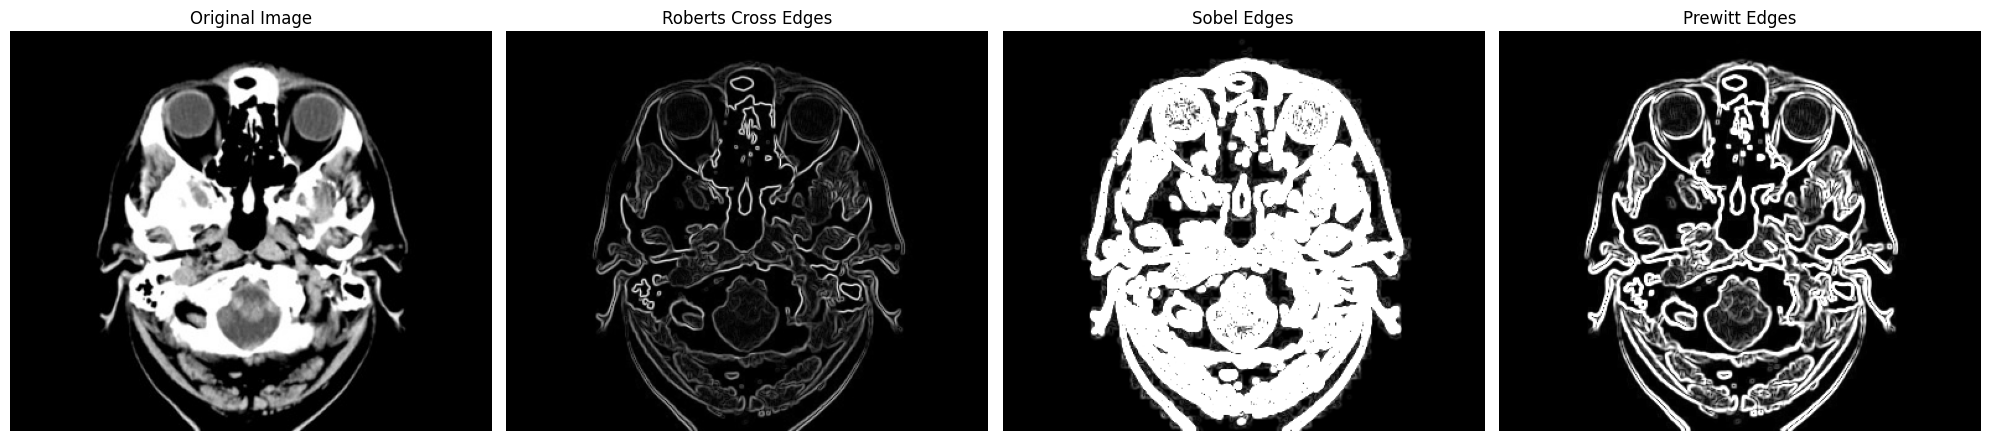

Edge detection applied successfully using Roberts Cross, Sobel, and Prewitt operators.


In [19]:
# Load the image
img = cv2.imread('//content/Picture4.jpg', cv2.IMREAD_GRAYSCALE)
if img is not None:
    # Apply Roberts Cross operator
    roberts_x = cv2.filter2D(img, cv2.CV_64F, np.array([[1, 0], [0, -1]]))
    roberts_y = cv2.filter2D(img, cv2.CV_64F, np.array([[0, 1], [-1,0]]))
    roberts_edges = np.sqrt(roberts_x**2 + roberts_y**2)
    roberts_edges = np.uint8(np.clip(roberts_edges, 0, 255))
    # Apply Sobel operator
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_edges = np.uint8(np.clip(sobel_edges, 0, 255))
    # Apply Prewitt operator (manual implementation as not directly in cv2)
    kernel_prewitt_x = np.array([[ -1, 0, 1], [ -1, 0, 1], [ -1, 0, 1]])
    kernel_prewitt_y = np.array([[ -1, -1, -1], [ 0, 0, 0], [ 1, 1, 1]])
    prewitt_x = cv2.filter2D(img, cv2.CV_64F, kernel_prewitt_x)
    prewitt_y = cv2.filter2D(img, cv2.CV_64F, kernel_prewitt_y)
    prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)
    prewitt_edges = np.uint8(np.clip(prewitt_edges, 0, 255))
    # Display the results
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(roberts_edges, cmap='gray')
    axes[1].set_title("Roberts Cross Edges")
    axes[1].axis('off')
    axes[2].imshow(sobel_edges, cmap='gray')
    axes[2].set_title("Sobel Edges")
    axes[2].axis('off')
    axes[3].imshow(prewitt_edges, cmap='gray')
    axes[3].set_title("Prewitt Edges")
    axes[3].axis('off')
    plt.tight_layout()
    plt.show()
    print("Edge detection applied successfully using Roberts Cross, Sobel, and Prewitt operators.")
else:
    print("Failed to load image. Please check the file path.")

Comparing Edge Detection Filters:

Think of edge detection as finding the lines or outlines in a picture. Different filters do this in slightly different ways:

*   Sharpening Filters (like High Boost and Unsharp): These make the edges look stronger by making the difference between light and dark areas bigger. But they don't just show you the lines themselves.

*   Gradient Filters (like Roberts, Sobel, and Prewitt):These look for places where the brightness changes quickly. That's usually where an edge is.
    *   Sobel and Prewitt are better at ignoring shaky parts (noise) in the picture compared to Roberts.

*   Laplacian Filter: This one finds edges by looking for sudden changes in how the brightness is changing. It's good at finding edges but can be tricked by noise in the picture.

*   Canny Filter: This is often considered one of the best because it does a few things: it reduces noise, finds edges accurately, and connects broken edge pieces.

